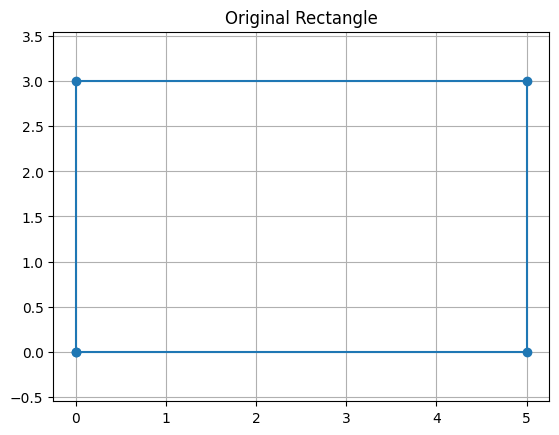

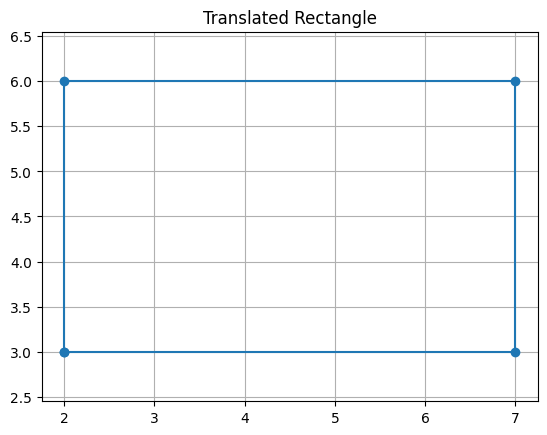

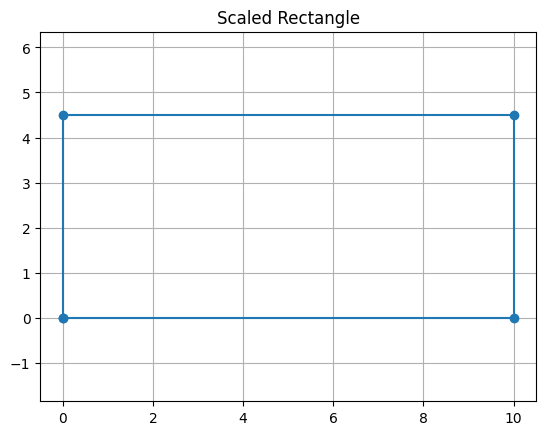

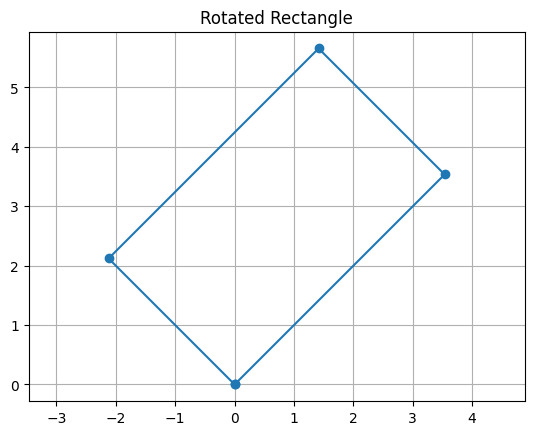

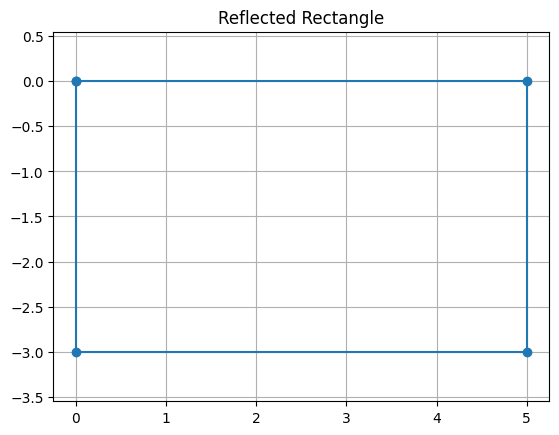

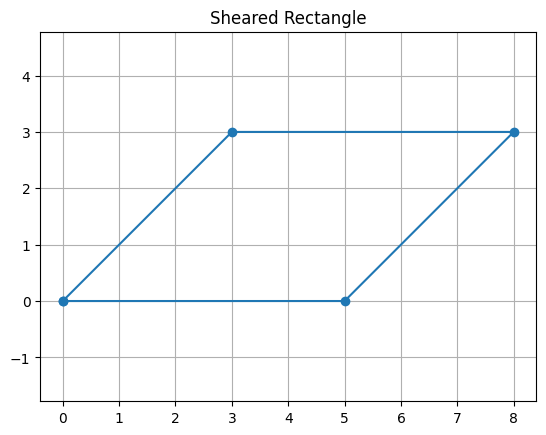

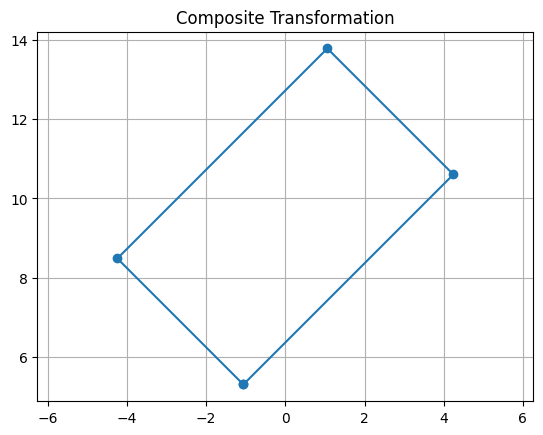

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vertices of the rectangle (2D object)
rectangle = np.array([
    [0, 0],
    [5, 0],
    [5, 3],
    [0, 3],
    [0, 0]  # Closing the rectangle
])

# Function to plot the object
def plot_object(vertices, title):
    plt.figure()
    plt.plot(vertices[:, 0], vertices[:, 1], marker='o')
    plt.title(title)
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# 1. Translation
def translate(vertices, tx, ty):
    translation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    # Add homogeneous coordinate (1) to each vertex
    homogeneous_vertices = np.hstack((vertices, np.ones((vertices.shape[0], 1))))
    # Apply translation
    translated_vertices = np.dot(homogeneous_vertices, translation_matrix.T)
    return translated_vertices[:, :2]  # Remove homogeneous coordinate

# 2. Scaling
def scale(vertices, sx, sy):
    scaling_matrix = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])
    homogeneous_vertices = np.hstack((vertices, np.ones((vertices.shape[0], 1))))
    scaled_vertices = np.dot(homogeneous_vertices, scaling_matrix.T)
    return scaled_vertices[:, :2]

# 3. Rotation
def rotate(vertices, angle):
    theta = np.radians(angle)
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])
    homogeneous_vertices = np.hstack((vertices, np.ones((vertices.shape[0], 1))))
    rotated_vertices = np.dot(homogeneous_vertices, rotation_matrix.T)
    return rotated_vertices[:, :2]

# 4. Reflection (about x-axis)
def reflect(vertices):
    reflection_matrix = np.array([
        [1, 0, 0],
        [0, -1, 0],
        [0, 0, 1]
    ])
    homogeneous_vertices = np.hstack((vertices, np.ones((vertices.shape[0], 1))))
    reflected_vertices = np.dot(homogeneous_vertices, reflection_matrix.T)
    return reflected_vertices[:, :2]

# 5. Shearing (along x-axis)
def shear(vertices, shx):
    shearing_matrix = np.array([
        [1, shx, 0],
        [0, 1, 0],
        [0, 0, 1]
    ])
    homogeneous_vertices = np.hstack((vertices, np.ones((vertices.shape[0], 1))))
    sheared_vertices = np.dot(homogeneous_vertices, shearing_matrix.T)
    return sheared_vertices[:, :2]

# Composite Transformation: Translation + Rotation + Scaling
def composite_transform(vertices, tx, ty, angle, sx, sy):
    translated = translate(vertices, tx, ty)
    rotated = rotate(translated, angle)
    scaled = scale(rotated, sx, sy)
    return scaled

# Plot original rectangle
plot_object(rectangle, "Original Rectangle")

# Apply transformations
translated_rectangle = translate(rectangle, 2, 3)
plot_object(translated_rectangle, "Translated Rectangle")

scaled_rectangle = scale(rectangle, 2, 1.5)
plot_object(scaled_rectangle, "Scaled Rectangle")

rotated_rectangle = rotate(rectangle, 45)
plot_object(rotated_rectangle, "Rotated Rectangle")

reflected_rectangle = reflect(rectangle)
plot_object(reflected_rectangle, "Reflected Rectangle")

sheared_rectangle = shear(rectangle, 1)
plot_object(sheared_rectangle, "Sheared Rectangle")

# Composite Transformation
composite_rectangle = composite_transform(rectangle, 2, 3, 45, 1.5, 1.5)
plot_object(composite_rectangle, "Composite Transformation")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_img.jpeg to test_img.jpeg


Original Image


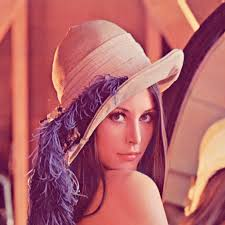

Translated Image


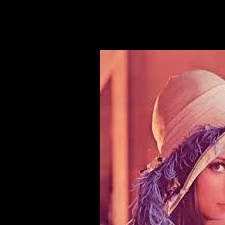

Flipped Image


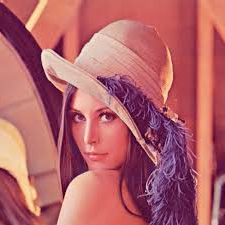

Rotated Image


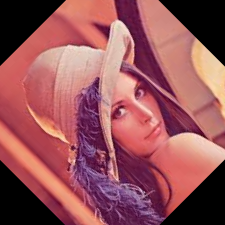

Scaled Image


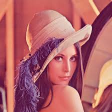

Cropped Image


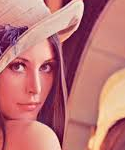

Sheared in X-axis Image


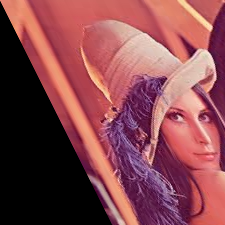

Sheared in Y-axis Image


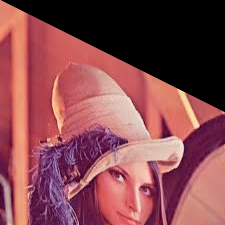

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the uploaded image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

# Display the original image
print("Original Image")
cv2_imshow(image)

# Image Translation
rows, cols, _ = image.shape
M = np.float32([[1, 0, 100], [0, 1, 50]])  # Translate by 100 pixels in x and 50 pixels in y
translated_image = cv2.warpAffine(image, M, (cols, rows))
print("Translated Image")
cv2_imshow(translated_image)

# Reflection (Flip)
flipped_image = cv2.flip(image, 1)  # 1 for horizontal flip, 0 for vertical flip, -1 for both
print("Flipped Image")
cv2_imshow(flipped_image)

# Rotation
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)  # Rotate by 45 degrees
rotated_image = cv2.warpAffine(image, M, (cols, rows))
print("Rotated Image")
cv2_imshow(rotated_image)

# Scaling
scaled_image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
print("Scaled Image")
cv2_imshow(scaled_image)

# Cropping
cropped_image = image[50:200, 100:300]  # Crop from (50, 100) to (200, 300)
print("Cropped Image")
cv2_imshow(cropped_image)

# Shearing in x-axis
M = np.float32([[1, 0.5, 0], [0, 1, 0]])
sheared_x_image = cv2.warpAffine(image, M, (cols, rows))
print("Sheared in X-axis Image")
cv2_imshow(sheared_x_image)

# Shearing in y-axis
M = np.float32([[1, 0, 0], [0.5, 1, 0]])
sheared_y_image = cv2.warpAffine(image, M, (cols, rows))
print("Sheared in Y-axis Image")
cv2_imshow(sheared_y_image)